# 1. Perkenalan

- Nama : Steven Kusuma
- Batch : 015
- Dataset : E-Mail classification NLP (https://www.kaggle.com/datasets/datatattle/email-classification-nlp)
- Objectives :

    - Mampu memahami konsep Computer Vision/NLP.
    - Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
    - Mampu mengimplementasikan Artificial Neural Network dengan data yang ada.
    - Mampu menganalisis dan menjelaskan layer yang dibuat.

# 2. Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

# Exploratory Dataset

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Text Preprocessing

import re
from nltk.tokenize import word_tokenize
import nltk.stem as stemmer
from nltk.stem.porter import *

# Metrics and Validation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Embedding Layer

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, TextVectorization, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout, Dense

from urllib import request
from PIL import Image

In [2]:
# Download Stopwords and Punkt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stevenkusuma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stevenkusuma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 3. Data Loading

In [3]:
# Load Dataset

data1 = pd.read_csv('SMS_train.csv',encoding='cp1252')
data1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [4]:
# Load Dataset

data2 = pd.read_csv('SMS_test.csv',encoding='cp1252')
data2

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [5]:
# Concat Splitted Dataset

data = pd.concat([data1, data2]).reset_index(drop=True)
data = data.iloc[: , 1:]
data

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


Concat data, nanti akan dilakukan splitting ulang di `data preprocessing`.

In [6]:
data.head()

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam


In [7]:
data.tail()

,Message_body,Label
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
1081,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [8]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Message_body  1082 non-null   object
 1   Label         1082 non-null   object
dtypes: object(2)
memory usage: 17.0+ KB


Data terdiri dari `1,082 rows` dan `2 columns` :

- `2 String`

# 4. Exploratory Data Analysis (EDA)

<AxesSubplot:ylabel='Label'>

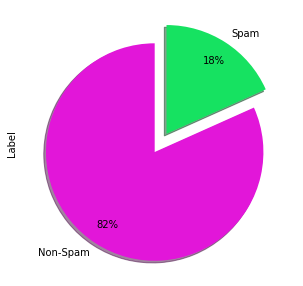

In [9]:
# Create Pie Chart to know spam and non-spam distribution

data['Label'].value_counts().plot(kind='pie', autopct='%1.0f%%',
                                  shadow=True,
                                  startangle=90,
                                  pctdistance=0.8,
                                  explode= (0.1,0.1),
                                  colors=['#e216d9', '#16e261'],
                                  figsize=(5,5))

`18%` dari total label adalah `Spam`, dan sisanya `82%` dari total label adalah `Non-Spam`. Ditemukan data imbalance.



Word Cloud for Non-Spam




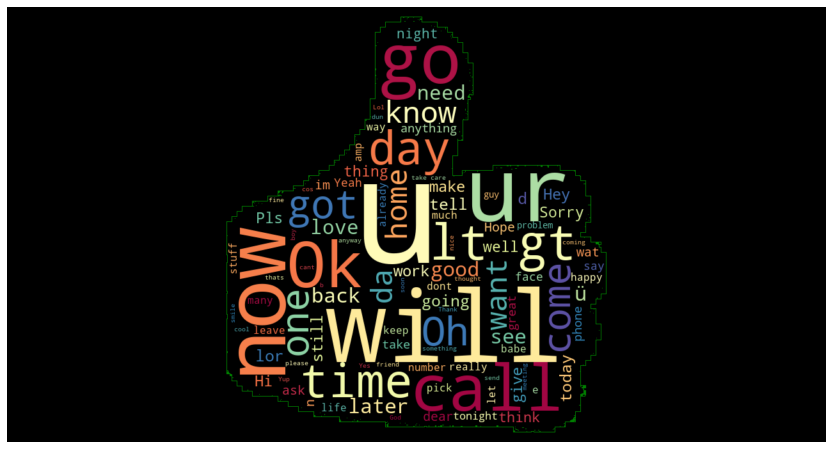



Word Cloud for Spam




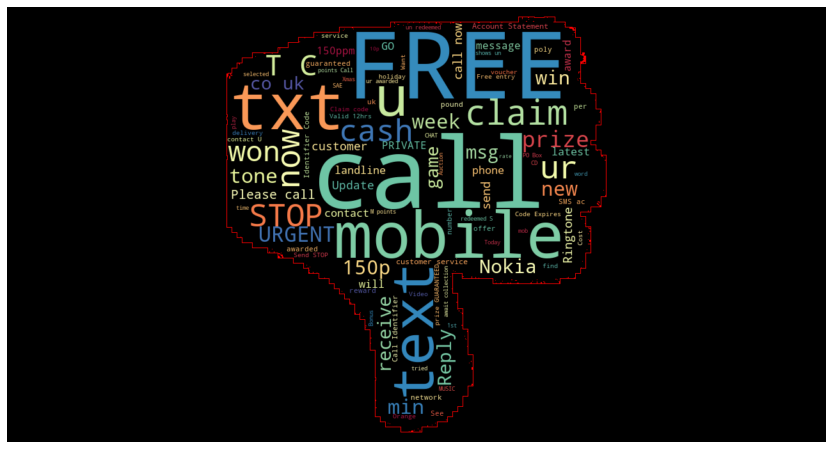

In [10]:
# Generating WordCloud for Stopwords of each label

Message_body = data['Message_body']


# Non-Spam WordCloud
data_not_spam = data.loc[data['Label']=='Non-Spam']

#===
Message_body_non_spam = " ".join(insul for insul in data_not_spam.Message_body)

l_mask = np.array(Image.open("up.jpeg"))

#== 
wc1 = WordCloud(background_color='black', mask=l_mask, mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
               
print('\n\nWord Cloud for Non-Spam\n\n')
wc1.generate(Message_body_non_spam)
plt.figure(figsize=(16, 8))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

#------------------------------------------------------------------------------------------------


# Spam WordCloud
data_spam = data.loc[data['Label']=='Spam']

#===
Message_body_spam = " ".join(insul for insul in data_spam.Message_body)

r_mask = np.array(Image.open("down.jpeg"))

#== 
wc2 = WordCloud(background_color='black', mask=r_mask, mode='RGB',
               width=500, max_words=100, height=500,
               random_state=1, contour_width=1, contour_color='red',colormap='Spectral')

print('\n\nWord Cloud for Spam\n\n')           
wc2.generate(Message_body_spam)
plt.figure(figsize=(16, 8))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

Berikut adalah `WordCloud` untuk text sesuai masing-masing label, yaitu `Spam` dan `Non-Spam` email.

Di masing-masing gambar terdapat `100 kata` WordCloud untuk masing-masing label.

`WordCloud` dibuat untuk lebih memprioritaskan kata-kata lain selain yang diatas.

Dimana :

- Thumbs up : `Non-Spam`
- Thumbs down : `Spam`

<AxesSubplot:>

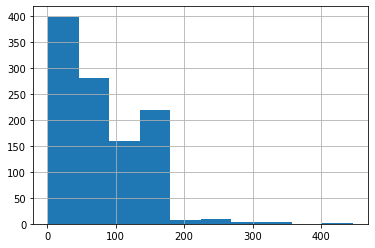

In [11]:
data['Message_body'].str.len().hist()

Range characters per kalimat di `Message_body` ada di `0 - 400` characters, dan generally di antara sekitar `0 - 175` characters.

<AxesSubplot:>

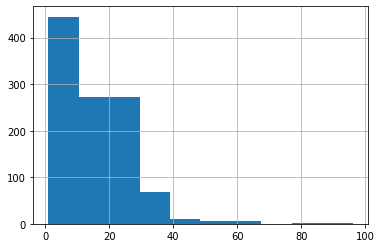

In [12]:
Message_body.str.split().\
    map(lambda x: len(x)).\
    hist()

Range kata per kalimat di `Message_body` ada di `0 - 90` kata, dan generally di antara sekitar `0 - 40` kata.

# 5. Data Preprocessing

## 5.1. Convert Target

In [13]:
data['Label'] =  data['Label'].map({"Non-Spam":0,"Spam":1})

Melabelkan antara :

- Non-Spam = 0
- Spam = 1

## 5.2. Get Data for Model Inference

In [14]:
# Get Data for model Inference

data_inf = data.sample(10, random_state=25)
data_inf

,Message_body,Label
554,U attend ur driving lesson how many times a wk...,0
113,Arun can u transfr me d amt,0
585,I said its okay. Sorry,0
1070,How much u trying to get?,0
273,Are u coming to the funeral home,0
123,So that takes away some money worries,0
443,After my work ah... Den 6 plus lor... U workin...,0
189,You have 1 new message. Call 0207-083-6089,1
616,Hi its me you are probably having too much fun...,0
119,Just sing HU. I think its also important to fi...,0


In [15]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1078,Try to do something dear. You read something f...,0
1079,Sun ah... Thk mayb can if dun have anythin on....,0
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",0


In [16]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Message_body,Label
0,U attend ur driving lesson how many times a wk...,0
1,Arun can u transfr me d amt,0
2,I said its okay. Sorry,0
3,How much u trying to get?,0
4,Are u coming to the funeral home,0
5,So that takes away some money worries,0
6,After my work ah... Den 6 plus lor... U workin...,0
7,You have 1 new message. Call 0207-083-6089,1
8,Hi its me you are probably having too much fun...,0
9,Just sing HU. I think its also important to fi...,0


## 5.3. Text to Lowercase, Removing Punctuations, Removing Other Non Needed Texts, Removing Stopwords

In [17]:
# A Function to use in the dataframe

def text_process(text):

  # 1. Change all text to Lowercase
  text = text.lower()
  
  # 2. Removing Mentions
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # 3. Removing Hashtags
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # 4. Removing \n
  text = re.sub(r"\\n", " ",text)
  
  # 5. Removing Whitespaces
  text = text.strip()

  # 6. Removing Links
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # 7. Removing non text characters such as Emojis, Mathematical symbols
  text = re.sub("[^A-Za-z\s']", " ", text)

  # 8. Removing RT
  text = re.sub("rt", " ",text)

  # 9. Tokenization
  tokens = word_tokenize(text)

  # 10. Removing Stopwords
  stopwords_en = list(set(stopwords.words('english')))
  text = ' '.join([word for word in tokens if word not in stopwords_en])
  
  # 11. Stemming
  stemmer = PorterStemmer()
  text = stemmer.stem(text)
  
  return text

Preprocess Text Documents dilakukan beberapa hal yaitu :

1. Text to Lowercase = karena `Call` dan `call` adalah sama arti, jadi untuk mengecilkan vocab bisa digunakan text to lowercase supaya sama
2. Removing Mentions, Hastags, NewLine, Whitespaces, Links, Text Characters, RT = karena tidak ada efek antara `Spam` ataupun `Non-Spam` email
3. Tokenization = Mengambil satu per satu kata di dalam kalimat
4. Removing Stopwords = supaya memfokuskan ke kata-kata yang penting saja
5. Stemming = Menghilangkan prural dari bahasa inggris seperti `Calls` dan `Call` adalah sama, stemming akan melakukan pekerjaan ini

In [18]:
# Applying Preprocessing to all Documents

data_train_test['Message_processed'] = data_train_test['Message_body'].apply(lambda x: text_process(x))
data_train_test

,Message_body,Label,Message_processed
0,Rofl. Its true to its name,0,rofl true nam
1,The guy did some bitching but I acted like i'd...,0,guy bitching acted like 'd interested buying s...
2,"Pity, * was in mood for that. So...any other s...",0,pity mood suggest
3,Will ü b going to esplanade fr home?,0,b going esplanade fr hom
4,This is the 2nd time we have tried 2 contact u...,1,nd time tried contact u u pound prize claim ea...
...,...,...,...
1067,7 wonders in My WORLD 7th You 6th Ur style 5th...,0,wonders world th th ur style th ur smile th ur...
1068,Try to do something dear. You read something f...,0,try something dear read something exam
1069,Sun ah... Thk mayb can if dun have anythin on....,0,sun ah thk mayb dun anythin thk book e lesson ...
1070,"SYMPTOMS when U are in love: ""1.U like listeni...",0,symptoms u love u like listening songs u get s...


## 5.4. Splitting between `X` (Corpus) and `y` (Target)

In [19]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(data_train_test.Message_processed, 
                                                            data_train_test.Label, 
                                                            test_size=0.15,
                                                            random_state=25,
                                                            stratify=data_train_test.Label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=25)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (774,)
Val Size :  (137,)
Test Size :  (161,)


## 5.5. Handling Missing Values

In [20]:
# Check Missing Values on X_train

X_train.isnull().sum()

0

In [21]:
# Check Missing Values on X_val

X_val.isnull().sum()

0

In [22]:
# Check Missing Values on X_test

X_test.isnull().sum()

0

In [23]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [24]:
# Check Missing Values on y_val

y_val.isnull().sum()

0

In [25]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

Tidak ada missing values yang perlu di handle

## 5.6. Pipeline

In [26]:
# Convert String into Numerical Vocabularies

count_vect = CountVectorizer()

X_train_vect = count_vect.fit_transform(X_train)
X_val_vect = count_vect.transform(X_val)
X_test_vect = count_vect.transform(X_test)

In [27]:
# Search for Total Vocab and Maximum Token in One Document

total_vocab = len(count_vect.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Total Vocab : ", total_vocab)
print("Maximum Sentence Length : ", max_sen_len, "word")

Total Vocab :  2539
Maximum Sentence Length :  49 word


In [28]:
# Text Vectorization (For Layer 1)

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train)

2022-10-17 15:41:59.977819: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Untuk layer 1 adalah `Text Vectorization` dimana :

- Max Tokens akan berjumlah = `Total Vocab`
- Output Sequence Length (`Vector`) = `Maximum Sentence Length`

In [29]:
# Embedding

embedding = Embedding(input_dim=total_vocab,
                      output_dim=172,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [30]:
# Tensor Pipeline Train Set
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=150).batch(64)

# Tensor Pipeline Test Set
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(64)

# Tensor Pipeline Validation Set
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(64)

# `Sequential API`

# 6. Model Definition

In [31]:
# Create Sequential API
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())

# Hidden Layer 1
model.add(Dense(32,activation='relu'))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

# Compiling
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 49)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 49, 172)           436708    
                                                                 
 global_average_pooling1d (G  (None, 172)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                5536      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 442,277
Trainable params: 442,277
Non-trai

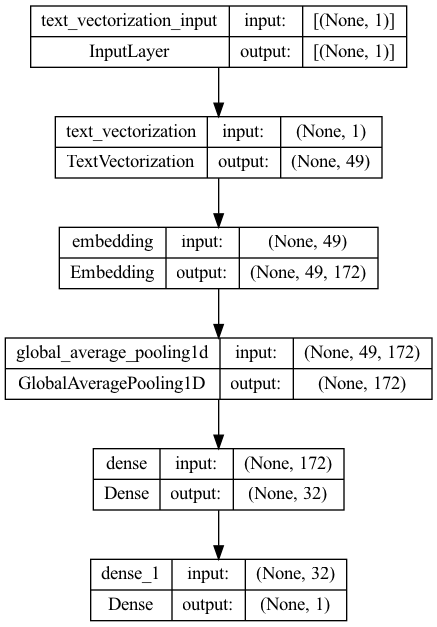

In [32]:
# Plot Layers

tf.keras.utils.plot_model(model, show_shapes=True)

# 7. Model Training

In [33]:
# Train the Model

history_1 = model.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
13/13 [==============================] - 0s 10ms/step - loss: 0.6600 - accuracy: 0.7739 - val_loss: 0.6219 - val_accuracy: 0.8248
Epoch 2/30
13/13 [==============================] - 0s 4ms/step - loss: 0.5957 - accuracy: 0.8152 - val_loss: 0.5581 - val_accuracy: 0.8248
Epoch 3/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.8152 - val_loss: 0.4909 - val_accuracy: 0.8248
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 0.4628 - accuracy: 0.8152 - val_loss: 0.4392 - val_accuracy: 0.8248
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 0.4186 - accuracy: 0.8152 - val_loss: 0.4111 - val_accuracy: 0.8248
Epoch 6/30
13/13 [==============================] - 0s 4ms/step - loss: 0.3952 - accuracy: 0.8152 - val_loss: 0.3986 - val_accuracy: 0.8248
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 0.3788 - accuracy: 0.8152 - val_loss: 0.3851 - val_accuracy: 0.8248
Epoch 8/30
13/13 [=

# 8. Model Evaluation

In [34]:
# Create Dataframe

history_seq_df = pd.DataFrame(history_1.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.659961,0.773902,0.621881,0.824818
1,0.595673,0.815245,0.558110,0.824818
2,0.527470,0.815245,0.490942,0.824818
3,0.462791,0.815245,0.439191,0.824818
4,0.418609,0.815245,0.411118,0.824818
5,0.395182,0.815245,0.398635,0.824818
6,0.378832,0.815245,0.385054,0.824818
7,0.358093,0.815245,0.367036,0.824818
8,0.331346,0.815245,0.344175,0.824818
9,0.298462,0.819121,0.314963,0.817518


Di `Epoch` ke 18 model sudah mulai tidak menunjukkan kenaikan atau penurunan lagi pada `Accuracy` maupun `Loss` nya. Bisa dibilang model ini cukup bagus untuk digunakan karena accuracy score nya sekitar `98%`. Dimana `2%` miss akan tidak sangat berpengaruh di dalam prediksi.

<AxesSubplot:>

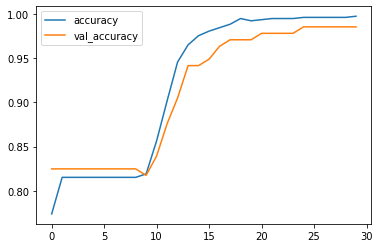

In [35]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

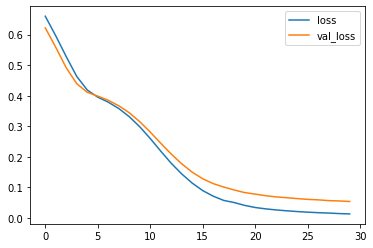

In [36]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

Model ini mulai stagnan di epoch ke `18` tidak menunjukkan perubahan naik atau turun di `Accuracy` ataupun `Loss`.

In [37]:
# Model Evaluation using Classification Report

y_pred_seq = model.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

6/6 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       131
           1       0.93      0.93      0.93        30

    accuracy                           0.98       161
   macro avg       0.96      0.96      0.96       161
weighted avg       0.98      0.98      0.98       161



Highlight disini adalah Model mendapatkan :

- Accuracy Score = `98%`
- Serta di prediksi Non-Spam = `99%`
- Di prediksi Spam = `95%`

Bisa dibilang model ini cukup bagus untuk memprediksi atau mengklasifikasikan apakah email itu spam atau non-spam

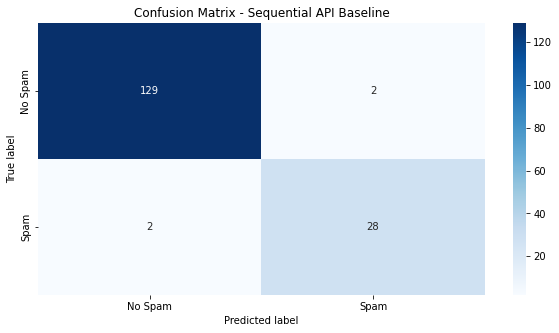

In [38]:
# Check Confusion Matrix

cm = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Spam', 'Spam'], 
            yticklabels = ['No Spam', 'Spam'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Sequential API Baseline")
plt.show()

Dari total :

- Non Spam = 131 total, ada 1 yang salah prediksi menjadi spam
- Spam = 30 total, ada 2 yang salah prediksi menjadi non-spam

# `Sequential API - Model Improvement`

# 6. Model Definition

In [39]:
# Create Sequential API
model_imp = Sequential()
model_imp.add(text_vectorization)
model_imp.add(embedding)
model_imp.add(GlobalAveragePooling1D())

# Hidden Layer 1
model_imp.add(Dense(32,activation='relu'))

# Output Layer
model_imp.add(Dense(1,activation='sigmoid'))

# Compiling
model_imp.compile(loss='binary_crossentropy',optimizer='Nadam',metrics='accuracy')

model_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 49)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 49, 172)           436708    
                                                                 
 global_average_pooling1d_1   (None, 172)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 32)                5536      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 442,277
Trainable params: 442,277
Non-tr

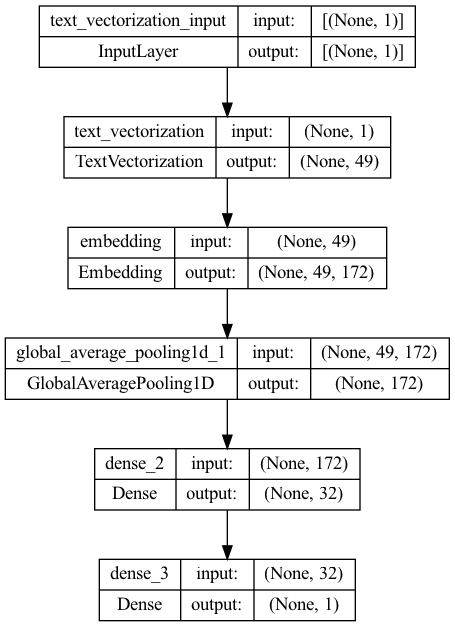

In [40]:
# Plot Layers

tf.keras.utils.plot_model(model_imp, show_shapes=True)

# 7. Model Training

In [41]:
# Train the Model

history_imp = model_imp.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
13/13 [==============================] - 0s 8ms/step - loss: 0.6353 - accuracy: 0.7649 - val_loss: 0.5593 - val_accuracy: 0.8248
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.8178 - val_loss: 0.4523 - val_accuracy: 0.8248
Epoch 3/30
13/13 [==============================] - 0s 3ms/step - loss: 0.3950 - accuracy: 0.8204 - val_loss: 0.3763 - val_accuracy: 0.8248
Epoch 4/30
13/13 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8230 - val_loss: 0.3282 - val_accuracy: 0.8321
Epoch 5/30
13/13 [==============================] - 0s 3ms/step - loss: 0.2728 - accuracy: 0.8514 - val_loss: 0.2918 - val_accuracy: 0.8394
Epoch 6/30
13/13 [==============================] - 0s 3ms/step - loss: 0.2307 - accuracy: 0.8992 - val_loss: 0.2572 - val_accuracy: 0.8759
Epoch 7/30
13/13 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9406 - val_loss: 0.2261 - val_accuracy: 0.9051
Epoch 8/30
13/13 [==

# 8. Model Evaluation

In [42]:
# Create Dataframe

history_imp_df = pd.DataFrame(history_imp.history)
history_imp_df

,loss,accuracy,val_loss,val_accuracy
0,0.635270,0.764858,0.559317,0.824818
1,0.498108,0.817829,0.452256,0.824818
2,0.395019,0.820413,0.376295,0.824818
3,0.323677,0.822997,0.328241,0.832117
4,0.272777,0.851421,0.291777,0.839416
5,0.230699,0.899225,0.257198,0.875912
6,0.191967,0.940568,0.226067,0.905109
7,0.159238,0.971576,0.197566,0.934307
8,0.131505,0.976744,0.173997,0.941606
9,0.109237,0.981912,0.153838,0.963504


Di `Epoch` ke 11 model sudah mulai tidak menunjukkan kenaikan atau penurunan lagi pada `Accuracy` maupun `Loss` nya. Bisa dibilang model ini cukup bagus untuk digunakan karena accuracy score nya sekitar `98%`. Dimana `2%` miss akan tidak sangat berpengaruh di dalam prediksi.

Bisa dibilang menggunakan optimizer `Nadam` model ini lebih cepat belajar data train nya.

<AxesSubplot:>

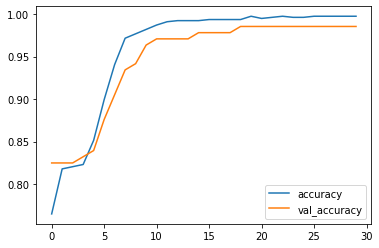

In [43]:
# Plot between Accuracy and val_accuracy

history_imp_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

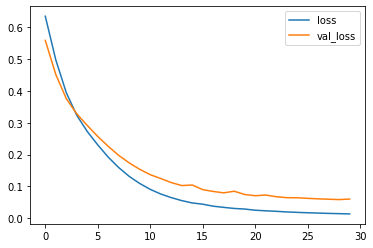

In [44]:
# Plot between loss and val_loss

history_imp_df[['loss', 'val_loss']].plot()

Meskipun model ini fast learner, tapi accuracy nya `over-fit` dimana validation accuracy nya di bawah train accuracy nya.

In [45]:
# Model Evaluation using Classification Report

y_pred_seq = model_imp.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

6/6 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       131
           1       0.90      0.93      0.92        30

    accuracy                           0.97       161
   macro avg       0.94      0.96      0.95       161
weighted avg       0.97      0.97      0.97       161



Highlight disini adalah Model mendapatkan :

- Accuracy Score = `98%`
- Serta di prediksi Non-Spam = `98%`
- Di prediksi Spam = `93%`

Menurun dari model pertama

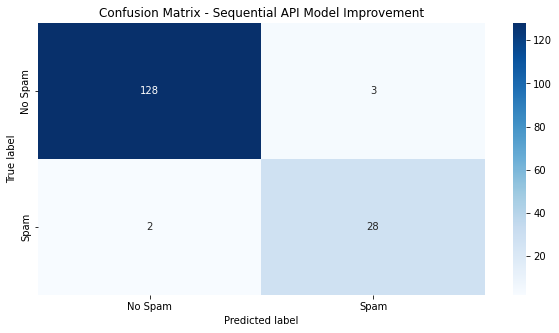

In [46]:
# Check Confusion Matrix

cm = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Spam', 'Spam'], 
            yticklabels = ['No Spam', 'Spam'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Sequential API Model Improvement")
plt.show()

Dari total :

- Non Spam = 131 total, ada 2 yang salah prediksi menjadi spam
- Spam = 30 total, ada 2 yang salah prediksi menjadi non-spam

Menurun dari model yang pertama, dimana salah prediksi true label non-spam hanya 1

# 9. Model Saving

In [47]:
# Freeze Best Model

model.trainable = False

In [48]:
# Best Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 49)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 49, 172)           436708    
                                                                 
 global_average_pooling1d (G  (None, 172)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                5536      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 442,277
Trainable params: 0
Non-trainable 

In [49]:
model.save("spam_check_model")

INFO:tensorflow:Assets written to: spam_check_model/assets


In [50]:
! zip -r spam_check_model.zip spam_check_model

updating: spam_check_model/ (stored 0%)
updating: spam_check_model/keras_metadata.pb (deflated 86%)
updating: spam_check_model/variables/ (stored 0%)
updating: spam_check_model/variables/variables.data-00000-of-00001 (deflated 12%)
updating: spam_check_model/variables/variables.index (deflated 59%)
updating: spam_check_model/saved_model.pb (deflated 85%)
updating: spam_check_model/assets/ (stored 0%)


# 10. Model Inference

In [51]:
# Display Inference-Set 

data_inf

,Message_body,Label
0,U attend ur driving lesson how many times a wk...,0
1,Arun can u transfr me d amt,0
2,I said its okay. Sorry,0
3,How much u trying to get?,0
4,Are u coming to the funeral home,0
5,So that takes away some money worries,0
6,After my work ah... Den 6 plus lor... U workin...,0
7,You have 1 new message. Call 0207-083-6089,1
8,Hi its me you are probably having too much fun...,0
9,Just sing HU. I think its also important to fi...,0


In [52]:
# A Function to use in the dataframe

def text_process(text):

  # 1. Change all text to Lowercase
  text = text.lower()
  
  # 2. Removing Mentions
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # 3. Removing Hashtags
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # 4. Removing \n
  text = re.sub(r"\\n", " ",text)
  
  # 5. Removing Whitespaces
  text = text.strip()

  # 6. Removing Links
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # 7. Removing non text characters such as Emojis, Mathematical symbols
  text = re.sub("[^A-Za-z\s']", " ", text)

  # 8. Removing RT
  text = re.sub("rt", " ",text)

  # 9. Tokenization
  tokens = word_tokenize(text)

  # 10. Removing Stopwords
  stopwords_en = list(set(stopwords.words('english')))
  text = ' '.join([word for word in tokens if word not in stopwords_en])
  
  # 11. Stemming
  stemmer = PorterStemmer()
  text = stemmer.stem(text)
  
  return text

In [53]:
# Applying Preprocessing to all Documents

data_inf['Message_processed'] = data_inf['Message_body'].apply(lambda x: text_process(x))
data_inf

,Message_body,Label,Message_processed
0,U attend ur driving lesson how many times a wk...,0,u attend ur driving lesson many times wk n day
1,Arun can u transfr me d amt,0,arun u transfr amt
2,I said its okay. Sorry,0,said okay sorri
3,How much u trying to get?,0,much u trying get
4,Are u coming to the funeral home,0,u coming funeral hom
5,So that takes away some money worries,0,takes away money worri
6,After my work ah... Den 6 plus lor... U workin...,0,work ah den plus lor u workin oso rite den go ...
7,You have 1 new message. Call 0207-083-6089,1,new message cal
8,Hi its me you are probably having too much fun...,0,hi probably much fun get message thought id tx...
9,Just sing HU. I think its also important to fi...,0,sing hu think also impo ant find someone femal...


In [54]:
data_inf_x = data_inf['Message_processed']

In [55]:
# Predict using Best Model & Change if >= 0.5 to 1

y_pred_inf = model.predict(data_inf_x)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 12ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [56]:
# Create DataFrame of Label Prediction using Best Model

y_pred_inf_data = pd.DataFrame(y_pred_inf, columns=['Label_Prediction'])
y_pred_inf_data

,Label_Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [57]:
# Concate between Inference-Set and Label's Prediction Best Model

data_inf = pd.concat([data_inf, y_pred_inf_data], axis=1)
data_inf

,Message_body,Label,Message_processed,Label_Prediction
0,U attend ur driving lesson how many times a wk...,0,u attend ur driving lesson many times wk n day,0
1,Arun can u transfr me d amt,0,arun u transfr amt,0
2,I said its okay. Sorry,0,said okay sorri,0
3,How much u trying to get?,0,much u trying get,0
4,Are u coming to the funeral home,0,u coming funeral hom,0
5,So that takes away some money worries,0,takes away money worri,0
6,After my work ah... Den 6 plus lor... U workin...,0,work ah den plus lor u workin oso rite den go ...,0
7,You have 1 new message. Call 0207-083-6089,1,new message cal,1
8,Hi its me you are probably having too much fun...,0,hi probably much fun get message thought id tx...,0
9,Just sing HU. I think its also important to fi...,0,sing hu think also impo ant find someone femal...,0


Tidak ada salah prediksi dari keseluruhan sample.

# 11. Pengambilan Kesimpulan

Di jaman era teknologi sekarang, kebanyakan orang sudah mengirimkan promosi ataupun ads ataupun text melalui email. Namun ada beberapa yang spam email, dan sangat mengganggu inbox email. Model ini dibuat untuk mengklasifikasikan apakah email itu spam atau tidak, jadi kita tidak perlu menghabiskan waktu di email tersebut. Dan tidak terjerumus ke pishing email.

Dengan menggunakan model yang telah saya buat. Best modelnya yaitu Baseline Model, mendapatkan tingkat sebagai berikut :

- Accuracy Score : `98%`
- True Label 0 : `99%`
- True Label 1 : `95%`

dan di sample testing tidak ada salah prediksi dari keseluruhan meskipun kata-kata sudah dilakukan preprocessing, model dapat secara benar memprediksi label nya masing-masing.